## PCA

In [31]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create 60 points in 3D
m = 60  # number of samples

# Random 3D points (x1 and x2 are random, x3 is a linear combination + noise)
X = np.random.rand(m, 3)

# Make the third feature a linear combination of the first two (plus small noise)
X[:, 2] = 0.5 * X[:, 0] + 0.2 * X[:, 1] + 0.05 * np.random.randn(m)

# Preview the dataset
print(X)
print(X.shape)

[[0.37454012 0.95071431 0.33825026]
 [0.59865848 0.15601864 0.31442989]
 [0.05808361 0.86617615 0.2429529 ]
 [0.70807258 0.02058449 0.29660997]
 [0.83244264 0.21233911 0.47006214]
 [0.18340451 0.30424224 0.21790784]
 [0.43194502 0.29122914 0.19384418]
 [0.13949386 0.29214465 0.13740755]
 [0.45606998 0.78517596 0.39806432]
 [0.51423444 0.59241457 0.41469128]
 [0.60754485 0.17052412 0.27602972]
 [0.94888554 0.96563203 0.60154634]
 [0.30461377 0.09767211 0.19793839]
 [0.44015249 0.12203823 0.25933313]
 [0.03438852 0.9093204  0.21158298]
 [0.66252228 0.31171108 0.41092577]
 [0.54671028 0.18485446 0.27632479]
 [0.77513282 0.93949894 0.58707888]
 [0.59789998 0.92187424 0.49797846]
 [0.19598286 0.04522729 0.07131932]
 [0.38867729 0.27134903 0.34189718]
 [0.35675333 0.28093451 0.25825521]
 [0.14092422 0.80219698 0.17133633]
 [0.98688694 0.77224477 0.6807201 ]
 [0.00552212 0.81546143 0.11711926]
 [0.72900717 0.77127035 0.55811188]
 [0.35846573 0.11586906 0.26033646]
 [0.62329813 0.33089802 0.33

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2d=pca.fit_transform(X)
x2d.shape

(60, 2)

In [33]:
pca.explained_variance_ratio_  #each pc component data varience 

array([0.58802505, 0.40381302])

### Goal: How to choose the number of dimensions in PCA?
> Rather than picking the number of dimensions randomly, you can choose the smallest number 
> of **principal components** that together
> explain a desired amount of the data’s variance — typically 95%

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]



## here we wil apply the PCA without #of feature , extracting each feature importance then take comulative sum of importance that gives >=95

#### make it  manually 

In [35]:
pca = PCA() 
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154 out of 28*28=784 feature
int(d)

154

#### make it by sklearn


In [36]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)


In [40]:
## reverse the original features 
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

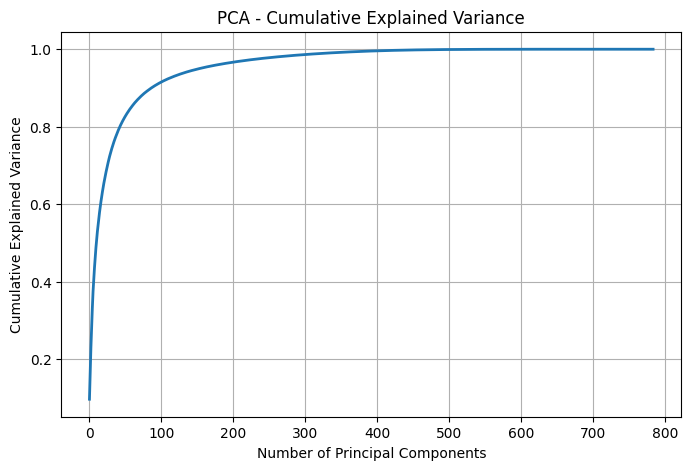

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(cumsum, linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


### select pca with rf

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
clf=make_pipeline(PCA(random_state=42),RandomForestClassifier(random_state=42))

param_distrib = {
 "pca__n_components": np.arange(10, 80),
 "randomforestclassifier__n_estimators": np.arange(50, 500)
 }

rnd_search=RandomizedSearchCV(clf,param_distrib,cv=3,n_iter=10)

rnd_search.fit(X_train[:1000], y_train[:1000])

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'pca__n_components': array([10, 11... 78, 79]), 'randomforestclassifier__n_estimators': array([ 50, ...97, 498, 499])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': np.int64(343), 'pca__n_components': np.int64(34)}
